# Predicting whether a tumor is benign or  malignant

So its 2021-01-28,
Thinking of creating a project related to it some prediction, this is the first time i'm working on a famous data set that is **Breast Cancer Wisconsin (Original) Data Set**  which you can find [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29).

Our dataset contains 11 columns:

- Sample code number: id number
- Clump Thickness: 1 - 10
- Uniformity of Cell Size: 1 - 10
- Uniformity of Cell Shape: 1 - 10
- Marginal Adhesion: 1 - 10
- Single Epithelial Cell Size: 1 - 10
- Bare Nuclei: 1 - 10
- Bland Chromatin: 1 - 10
- Normal Nucleoli: 1 - 10
- Mitoses: 1 - 10
- Class: (2 for benign, 4 for malignant)

**Our goal is to predict whether a tumor is benign or malignant, we have to predict the class of tumor** and we know that it is dependent on all other parameters which are specified above:

Since we want to predict a class which depends on other parameters we are going to use **Classification algorithms**.


## Step-1: Importing the libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step-2:  Importing the dataset

In [87]:
import os
os.listdir()

['.ipynb_checkpoints',
 '50_Startups.csv',
 'breast-cancer-wisconsin.data',
 'breast-cancer-wisconsin.names',
 'breast_cancer.csv',
 'Data preprocessing.ipynb',
 'Data.csv',
 'debug.log',
 'Decision_tree_regression.ipynb',
 'decission_tree_classifier.ipynb',
 'K-nearest_neighbours.ipynb',
 'kernel_svm_clf.ipynb',
 'k_nearest_neighbors.ipynb',
 'Logistic_Regression',
 'Logistic_Regression.ipynb',
 'Logistic_Regression.zip',
 'Multiple_linear Regression.ipynb',
 'Naive_bayes_classifiction_algo.ipynb',
 'polynomial regression.ipynb',
 'Position_Salaries.csv',
 'Predicting- tumor is benign or malignant.ipynb',
 'Random_Forest_Classifier.ipynb',
 'Random_forest_regression.ipynb',
 'regression_model.csv',
 'Salary_Data.csv',
 'Satisfactory_job_predictor.ipynb',
 'Simple linear regression.ipynb',
 'Social_Network_Ads.csv',
 'support_vector_machine.ipynb',
 'Support_vector_regression.ipynb',
 'SVM.ipynb',
 'wdbc.data',
 'wpbc.data']

In [88]:
dataset=pd.read_csv('breast-cancer-wisconsin.data')
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


### Observations 
- So in this dataset we are not having columns name.
- We also know that null values are represented by '?' in the dataset.

**We will read dataset again and will specify the column names and null values.**

In [89]:
# Reading the csv file , and we know that the missing values are represented by '?'
df=pd.read_csv('breast-cancer-wisconsin.data',header=0,na_values='?')
# adding column names to our dataset 
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4


In [90]:
# Having column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           698 non-null    int64  
 1   Clump Thickness              698 non-null    int64  
 2   Uniformity of Cell Size      698 non-null    int64  
 3   Uniformity of Cell Shape     698 non-null    int64  
 4   Marginal Adhesion            698 non-null    int64  
 5   Single Epithelial Cell Size  698 non-null    int64  
 6   Bare Nuclei                  682 non-null    float64
 7   Bland Chromatin              698 non-null    int64  
 8   Normal Nucleoli              698 non-null    int64  
 9   Mitoses                      698 non-null    int64  
 10  Class                        698 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.0 KB


In [91]:
# Checking for missing values in our dataset 
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

**So as we can see that there are 16 missing values in our dataset in 'Bare Nuclei' column.**
- We will drop missing values as it will not affect our dataset.

In [92]:
df=df.dropna()
df.shape

(682, 11)

In [93]:
# Having the description statistics of the dataset
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,2.700880
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.954916
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Step -3: Visualising the dataset 

Histogram: Exploring The Distribution of Values In A Column
Using plt.hist

Let's generate histograms to explore the distributions of the following columns:

Note: We're going to use Series.describe() to understand the data distribution of each column

- Sample code number: id number
- Clump Thickness: 1 - 10
- Uniformity of Cell Size: 1 - 10
- Uniformity of Cell Shape: 1 - 10
- Marginal Adhesion: 1 - 10
- Single Epithelial Cell Size: 1 - 10
- Bare Nuclei: 1 - 10
- Bland Chromatin: 1 - 10
- Normal Nucleoli: 1 - 10
- Mitoses: 1 - 10
- Class: (2 for benign, 4 for malignant)


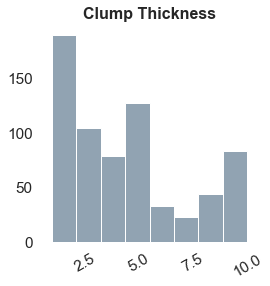

--------------------------------
count    682.000000
mean       4.441349
std        2.822751
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump Thickness, dtype: float64
--------------------------------


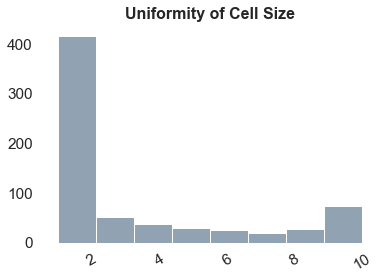

--------------------------------
count    682.000000
mean       3.153959
std        3.066285
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Uniformity of Cell Size, dtype: float64
--------------------------------


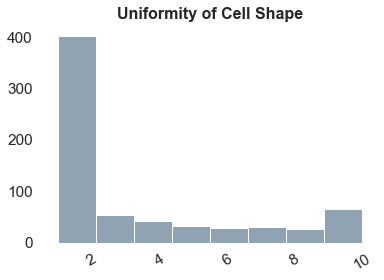

--------------------------------
count    682.000000
mean       3.218475
std        2.989568
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Uniformity of Cell Shape, dtype: float64
--------------------------------


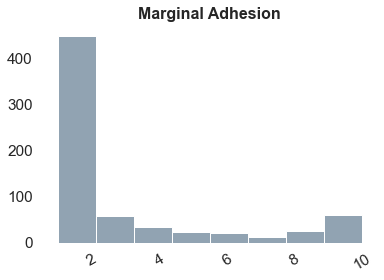

--------------------------------
count    682.000000
mean       2.832845
std        2.865805
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Marginal Adhesion, dtype: float64
--------------------------------


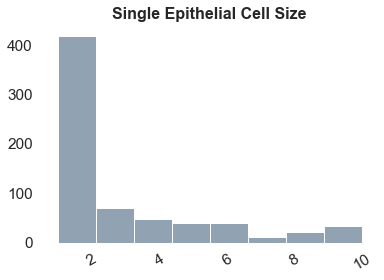

--------------------------------
count    682.000000
mean       3.236070
std        2.224214
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: Single Epithelial Cell Size, dtype: float64
--------------------------------


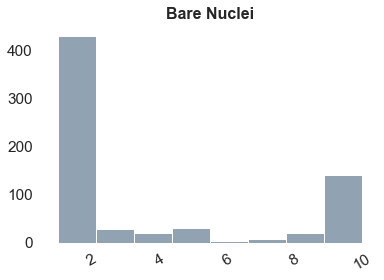

--------------------------------
count    682.000000
mean       3.548387
std        3.645226
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare Nuclei, dtype: float64
--------------------------------


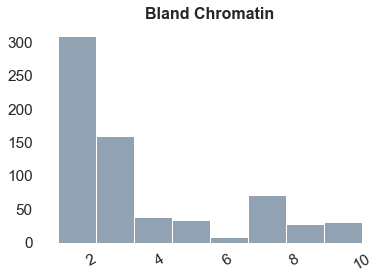

--------------------------------
count    682.000000
mean       3.445748
std        2.451435
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Bland Chromatin, dtype: float64
--------------------------------


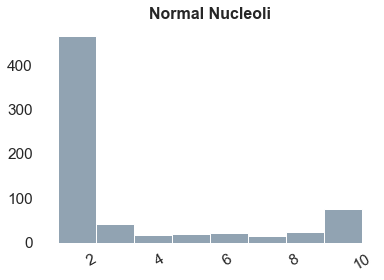

--------------------------------
count    682.000000
mean       2.872434
std        3.054065
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Normal Nucleoli, dtype: float64
--------------------------------


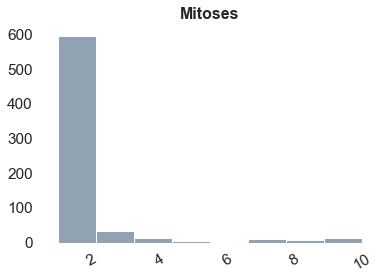

--------------------------------
count    682.000000
mean       1.604106
std        1.733792
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: Mitoses, dtype: float64
--------------------------------


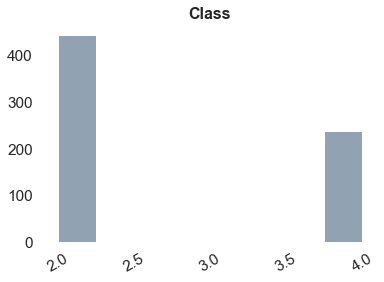

--------------------------------
count    682.000000
mean       2.700880
std        0.954916
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64
--------------------------------


In [94]:
#Generate histograms in one go using a for loop
#we use 8 bins to simplify the visualization
cols = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

fig=plt.figure(figsize=(50,4))
for sp in range (len(cols)):
    sns.set_style('white')
    ax=fig.add_subplot(1,11,sp+1)
    plt.xticks(rotation=30)
    sns.set(font_scale=1.4)
    plt.hist(x= df[cols[sp]],  bins = 8,color = '#91a3b2', ec='#ffffff')
    sns.despine(left=True, bottom=True)
    plt.title(cols[sp], weight='bold').set_fontsize('16')
    plt.tick_params(axis = "x", which = "both", bottom = False)
    plt.tick_params(axis='y',which='both',right=False,top=False,bottom=False,left=False)
    plt.show()
    print('--------------------------------')
    print(df[cols[sp]].describe())
    print('--------------------------------')

**Great!! Using Histograms we are able to visualize the data distribution properly. Now lets conclude:** *Note: Obviously, histogram and series.describe() will display us slightly different numbers. What we are trying to achieve here is to demonstrate how we can easily visualize data distribution with decent accuracy using histogram.

**Some important conclusions are:**

- As we can see that class 2 is having more than 400 itmes and class 1 is having approx 250 itmes.
- Clump Thickness- majority no of people in dataset are having clump thickness less than 2.5.


## Step- 4: Seperating the features and target values

In [95]:
# seperating features and target
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [96]:
# printing first 5 rows of the arrays
print(x[:5],'\n','-'*50)
print(y[:5])

[[ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 3.  1.  1.  1.  2.  2.  3.  1.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 4.  1.  1.  3.  2.  1.  3.  1.  1.]
 [ 8. 10. 10.  8.  7. 10.  9.  7.  1.]] 
 --------------------------------------------------
[2 2 2 2 4]


In [97]:
# reshaping y
y=y.reshape(len(y),1)
y[:5]

array([[2],
       [2],
       [2],
       [2],
       [4]], dtype=int64)

## Step -5: Splitting the datset into Training set and test set

In [98]:
# splitting the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [99]:
# printing first 5 rows of training and test dataset
print(x_train[:5],'\n','-'*75)
print(x_test[:5],'\n','-'*75)
print(y_train[:5],'\n','-'*75)
print(y_test[:5])

[[ 3.  1.  1.  1.  2.  1.  2.  1.  1.]
 [ 1.  1.  1.  1.  2.  1.  3.  2.  1.]
 [ 5.  1.  1.  1.  2.  1.  2.  2.  1.]
 [ 8.  6.  4. 10. 10.  1.  3.  5.  1.]
 [ 4.  3.  2.  1.  3.  1.  2.  1.  1.]] 
 ---------------------------------------------------------------------------
[[8. 3. 3. 1. 2. 2. 3. 2. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [6. 8. 7. 8. 6. 8. 8. 9. 1.]
 [1. 1. 1. 1. 3. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 2. 1. 1.]] 
 ---------------------------------------------------------------------------
[[2]
 [2]
 [2]
 [4]
 [2]] 
 ---------------------------------------------------------------------------
[[2]
 [2]
 [4]
 [2]
 [2]]


## Step -6: Feature Scaling

In [100]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [101]:
print(x_train[:5],'\n','-'*75)
print(x_test[:5],'\n','-'*75)
print(y_train[:5],'\n','-'*75)
print(y_test[:5])

[[-0.51415447 -0.71153642 -0.76512418 -0.64874184 -0.56618947 -0.70657473
  -0.59807765 -0.61292732 -0.34601001]
 [-1.22137637 -0.71153642 -0.76512418 -0.64874184 -0.56618947 -0.70657473
  -0.19857742 -0.28564847 -0.34601001]
 [ 0.19306743 -0.71153642 -0.76512418 -0.64874184 -0.56618947 -0.70657473
  -0.59807765 -0.28564847 -0.34601001]
 [ 1.25390027  0.93220278  0.2416873   2.50180064  3.05034577 -0.70657473
  -0.19857742  0.69618809 -0.34601001]
 [-0.16054352 -0.05404074 -0.42952036 -0.64874184 -0.11412256 -0.70657473
  -0.59807765 -0.61292732 -0.34601001]] 
 ---------------------------------------------------------------------------
[[ 1.25390027 -0.05404074 -0.09391653 -0.64874184 -0.56618947 -0.43530524
  -0.19857742 -0.28564847 -0.34601001]
 [-1.22137637 -0.71153642 -0.76512418 -0.64874184 -1.01825637 -0.70657473
  -0.99757789 -0.61292732 -0.34601001]
 [ 0.54667838  1.58969846  1.24849877  1.80168009  1.24207815  1.19231167
   1.79892376  2.0053035  -0.34601001]
 [-1.22137637 -0.

## Step -7: Using Classifiaction Algorithms for training our dataset

### Model -1: Training the logistic Regression model on training set

In [102]:
from sklearn.linear_model import LogisticRegression
reg_clf=LogisticRegression(random_state=0)
reg_clf.fit(x_train,y_train.reshape(511,))

LogisticRegression(random_state=0)

### Predicting the test set results


In [103]:
y_pred_log=reg_clf.predict(x_test)
y_pred_log

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

-----------------
----------------

### Model -2:  Deploying the K-nearest_neighbours  on training set

In [104]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
neigh_clf.fit(x_train,y_train.reshape(len(y_train),))

KNeighborsClassifier()

### Predicting the test set results 


In [105]:
y_pred_neigh=neigh_clf.predict(x_test)
y_pred_neigh

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

----------------------
------------------------

### Model -3:  Deploying the Support Vector Machines model on training set

In [106]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear', random_state = 0)
svm_clf.fit(x_train, y_train.reshape(len(y_train,)))

SVC(kernel='linear', random_state=0)

### Predicting the test set results 

In [107]:
y_pred_svm_linear=neigh_clf.predict(x_test)
y_pred_svm_linear

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

------------
--------------

 ### Model -4:  Deploying the Kernel SVM model on training set

In [108]:
from sklearn.svm import SVC
svm_clf_rbf=SVC(kernel='rbf',random_state=0)
svm_clf_rbf.fit(x_train,y_train.reshape(len(y_train),))

SVC(random_state=0)

### Predicting the test set results 

In [109]:
y_pred_svm_rbf=svm_clf_rbf.predict(x_test)
y_pred_svm_rbf

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

---------------
----------------

### Model -5:  Deploying the  Naïve Bayes model on training set

In [110]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_clf=GaussianNB()
naive_bayes_clf.fit(x_train,y_train.reshape(len(y_train),))

GaussianNB()

### Predicting the test set results 

In [111]:
y_pred_naive_bayes=naive_bayes_clf.predict(x_test)
y_pred_naive_bayes

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

------------
------------

### Model -6: Applying the Decision-Tree classification algorithm  on training dataset 

In [112]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
decision_tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the test set results 

In [113]:
y_pred_decision=decision_tree_clf.predict(x_test)
y_pred_decision

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

----------------
-------------------

###  Model -7: Training the Random Forest Classifier Model on Training dataset 

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
rf_clf.fit(x_train,y_train.reshape(len(y_train),))

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

### Predicting the test set results 

In [115]:
y_pred_rf_clf=rf_clf.predict(x_test)
y_pred_rf_clf

array([2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

------------------
---------------

Hmmm.....it was a bit hectic but now we are almost done.

**For now we have :-**
- **Trained our model by using all the classification algorithms.**
- **Predicted the result on the test data set.**

**What we are going to do :-**
- **We will create confusion_matrix.**
- **We will check the accuracy of our models and will choose the best one.**


## Step -8: Counfusion Matrix and Accuracy score for all the models 

###  Making the confusion matrix for Logistic Regression

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_pred_log)

array([[109,   3],
       [  2,  57]], dtype=int64)

In [117]:
print('Accuracy score(Logistic Regression):',round(accuracy_score(y_test,y_pred_log),3))

Accuracy score(Logistic Regression): 0.971


-------------

### Making the confusion matrix for  K-nearest_neighbours

In [118]:
confusion_matrix(y_test, y_pred_neigh)

array([[109,   3],
       [  1,  58]], dtype=int64)

In [119]:
print('Accuracy score(K-nearest_neighbours):',round(accuracy_score(y_test,y_pred_neigh),3))

Accuracy score(K-nearest_neighbours): 0.977


-------

### Making the confusion matrix for Support Vector Machines model

In [120]:
confusion_matrix(y_test, y_pred_svm_linear)

array([[109,   3],
       [  1,  58]], dtype=int64)

In [121]:
print('Accuracy score(SVM Linear):',round(accuracy_score(y_test,y_pred_svm_linear),3))

Accuracy score(SVM Linear): 0.977


----------

### Making the confusion matrix for Kernel SVM model

In [122]:
confusion_matrix(y_test, y_pred_svm_rbf)

array([[109,   3],
       [  1,  58]], dtype=int64)

In [123]:
print('Accuracy score(Kernel SVM):',round(accuracy_score(y_test,y_pred_svm_rbf),3))

Accuracy score(Kernel SVM): 0.977


-------------

### Making the confusion matrix for Naïve Bayes model

In [124]:
confusion_matrix(y_test, y_pred_naive_bayes)

array([[107,   5],
       [  0,  59]], dtype=int64)

In [125]:
print('Accuracy score(Naïve Bayes):',round(accuracy_score(y_test,y_pred_naive_bayes),3))

Accuracy score(Naïve Bayes): 0.971


----------

### Making the confusion matrix for Decision-Tree classification algorithm model

In [126]:
confusion_matrix(y_test, y_pred_decision)

array([[107,   5],
       [  6,  53]], dtype=int64)

In [127]:
print('Accuracy score(Decision-Tree Classification):',round(accuracy_score(y_test,y_pred_naive_bayes),3))

Accuracy score(Decision-Tree Classification): 0.971


----------

### Making the confusion matrix for Random-Forest-Classifier 

In [128]:
confusion_matrix(y_test, y_pred_rf_clf)

array([[110,   2],
       [  0,  59]], dtype=int64)

In [131]:
print('Accuracy score(Random Forest Classifier):',round(accuracy_score(y_test,y_pred_rf_clf),3))

Accuracy score(Random Forest Classifier): 0.988


--------

**Great we are done with creating Confusion matrics and calculating the accuracy, now its time for Conclusions.**

## Step -9: Conclusions (Choosing the best prediction model)

|Classification Model| Accuracy Score|
|--------------------|---------------|
|Logisic Regression|  **0.971** |
|K-nearest_neighbours| **0.977** |
|Support Vector Machines|**0.977**|
|Kernel SVM |**0.977**|
|Naïve Bayes|**0.971**|
|Decision-Tree classification|**0.971**|
|Random-Forest-Classifier|**0.988**|

**So we can see that in our case All the models are performing very well, But its the RandomForestClassifier which is performing exceptinally well.**

**So we will go with RandomForestClassifier.**